# Churn Modelling

## Content

This project data set contains details of a bank's customers and the target variable is a binary variable which is reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. So here I am going to build a model that will determine if a customer will continue with bank or not.

In [1]:
# import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA 

The first thing I want to do here is look at the data. Identify numerical and categorical variables.
See if there is a need to clean the headers and data in a way preferred for formating and processing.  

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here, just taking a peek at the data, I can see that the headers are capitalized, the **'RowNumber' and 'CustomerId'** column is not needed since pandas gives me a good indexing system already. And just as a peek, without further exploring, I see that the data is freshly & nicely prepared as the numerical and categorical data have been separated quite nicely.

In [4]:
# convert all columns to lower
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [5]:
# remove the 'rownumber' column and pr
del df['rownumber']
del df['customerid']
del df['surname']

In [6]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# change all "string" data to lowercase
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower()

Okay now, I'll dive deeper into the data to discover the information about this data. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

But on another look, I see I can change the **'hascrcard', 'isactivemember'** to categorical data with **'1' & '0' to 'yes' & 'no'** respectively. So there is some encoding to be done.

In [11]:
# has credit cards encoding
hascrcard_values = {
    1: 'yes',
    0: 'no'
}

df.hascrcard = df.hascrcard.map(hascrcard_values)

# is an active member
isactivemember_values = {
    1: 'yes',
    0: 'no'
}
df.isactivemember = df.isactivemember.map(isactivemember_values)

In [12]:
# look at the data again
df.head(10)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,yes,yes,101348.88,1
1,608,spain,female,41,1,83807.86,1,no,yes,112542.58,0
2,502,france,female,42,8,159660.80,3,yes,no,113931.57,1
3,699,france,female,39,1,0.00,2,no,no,93826.63,0
4,850,spain,female,43,2,125510.82,1,yes,yes,79084.10,0
5,645,spain,male,44,8,113755.78,2,yes,no,149756.71,1
6,822,france,male,50,7,0.00,2,yes,yes,10062.80,0
7,376,germany,female,29,4,115046.74,4,yes,no,119346.88,1
8,501,france,male,44,4,142051.07,2,no,yes,74940.50,0
9,684,france,male,27,2,134603.88,1,yes,yes,71725.73,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  object 
 8   isactivemember   10000 non-null  object 
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


In [297]:
# split the categorical and numerical columns
# categorical = []
categorical = ['geography', 'gender', 'hascrcard', 'isactivemember']
numerical = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
# numerical = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [298]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

creditscore
[619 608 502 699 850 645 822]
460

geography
['france' 'spain' 'germany']
3

gender
['female' 'male']
2

age
[42 41 39 43 44 50 29]
70

tenure
[2 1 8 7 4 6 3]
11

balance
[     0.    83807.86 159660.8  125510.82 113755.78 115046.74 142051.07]
6382

numofproducts
[1 3 2 4]
4

hascrcard
['yes' 'no']
2

isactivemember
['yes' 'no']
2

estimatedsalary
[101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8 ]
9999

exited
[1 0]
2



From the above, it seems this there is no null value and all categorical variables are properly encoded. 

Next, look at the **relations** in our numerical data

In [299]:
df[numerical].corr() # the correlation matrix

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


Does not say much

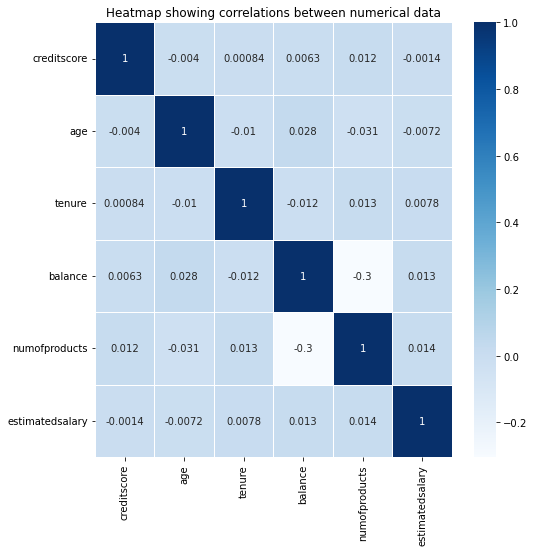

In [300]:
plt.figure(figsize=(8,8))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [301]:
df[numerical].corr().unstack().sort_values(ascending = False)

creditscore      creditscore        1.000000
age              age                1.000000
numofproducts    numofproducts      1.000000
balance          balance            1.000000
tenure           tenure             1.000000
estimatedsalary  estimatedsalary    1.000000
balance          age                0.028308
age              balance            0.028308
estimatedsalary  numofproducts      0.014204
numofproducts    estimatedsalary    0.014204
                 tenure             0.013444
tenure           numofproducts      0.013444
estimatedsalary  balance            0.012797
balance          estimatedsalary    0.012797
creditscore      numofproducts      0.012238
numofproducts    creditscore        0.012238
estimatedsalary  tenure             0.007784
tenure           estimatedsalary    0.007784
creditscore      balance            0.006268
balance          creditscore        0.006268
creditscore      tenure             0.000842
tenure           creditscore        0.000842
creditscor

From here I can see there is low corelation amongst the numeric data. So the best way I can determine if a feature is important is excuse it from the training dataset and see how it affects it.

### Data separation  - Setting up the validation framework

I am gonna split it into three datasets (train, val, and test) - training, validation and test datasets
I will use scikit-learn for this step

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score

In [303]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [304]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [305]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [306]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [307]:
df.head() # index reset

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,yes,yes,101348.88,1
1,608,spain,female,41,1,83807.86,1,no,yes,112542.58,0
2,502,france,female,42,8,159660.80,3,yes,no,113931.57,1
3,699,france,female,39,1,0.00,2,no,no,93826.63,0
4,850,spain,female,43,2,125510.82,1,yes,yes,79084.10,0


In [308]:
y_train = df_train.exited.values
y_val = df_val.exited.values
y_test = df_test.exited.values

In [309]:
# drop target column
df_train = df_train.drop('exited', axis=1)
df_val = df_val.drop('exited', axis=1)
df_test = df_test.drop('exited', axis=1)

In [310]:
df_train.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,789,france,female,32,7,69423.52,1,yes,no,107499.39
1,583,germany,female,41,5,77647.60,1,yes,no,190429.52
2,767,germany,female,35,6,132253.22,1,yes,no,115566.57
3,718,france,male,48,9,0.00,2,yes,yes,72105.63
4,686,germany,male,26,1,57422.62,1,yes,yes,79189.40


I still want to know what variables are important.
**ROC AUC** could also be used to evaluate feature importance of numerical variables.

In [311]:
numerical

['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [312]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%15s, %.3f' % (c, auc))

    creditscore, 0.518
            age, 0.732
         tenure, 0.512
        balance, 0.570
  numofproducts, 0.575
estimatedsalary, 0.505


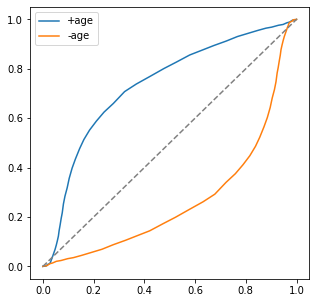

In [313]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.age)
plt.plot(fpr, tpr, label='+age')

fpr, tpr, _ = roc_curve(y_train, -df_train.age)
plt.plot(fpr, tpr, label='-age')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

There's separation in distribution of age between positive and negative classes. Does it mean age is important here? 

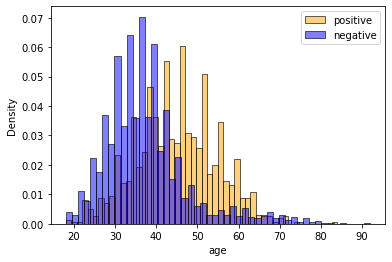

In [314]:
sns.histplot(df_train.age[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.age[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

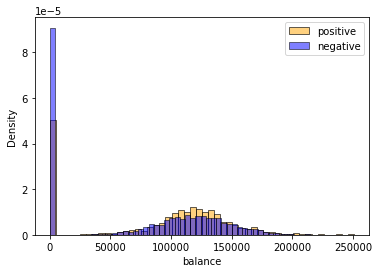

In [315]:
sns.histplot(df_train.balance[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.balance[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

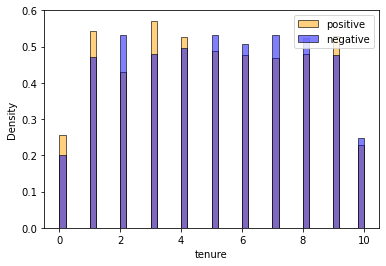

In [316]:
sns.histplot(df_train.tenure[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.tenure[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

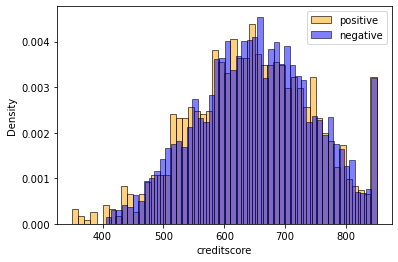

In [317]:
sns.histplot(df_train.creditscore[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.creditscore[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

After some help collected by good friends of the datatalkclub, I was told to get the correlation between features and the target for feature importance in relation to target variable. " Because correlation between features and themselves tells us if there is reduntant information in the set (which helps us to keep/eliminate features, but it doesn't clearly tells us the relationship feature and target)" - Kattson Bastos Advice

In [318]:
df_full_train[numerical].corrwith(df_full_train.exited).abs().sort_values(ascending = False)

age                0.278079
balance            0.116926
numofproducts      0.040868
creditscore        0.026420
tenure             0.008248
estimatedsalary    0.006483
dtype: float64

Hence from above, it is seen what numerical variables are really affecting the target variables


Now, I will look at the feature importance for the categorical variables

In [319]:
# determine the feature importance for the categorical variables
# use the mutual_info_score to determine the relation of 
# one categorical variable to the target variable

def mutual_info_exited_score(series):
    return mutual_info_score(series, df_full_train.exited)

In [320]:
categorical

['geography', 'gender', 'hascrcard', 'isactivemember']

In [321]:
mutual_info = df_full_train[categorical].apply(mutual_info_exited_score)
mutual_info.sort_values(ascending=False)

geography         0.013117
isactivemember    0.012872
gender            0.005598
hascrcard         0.000100
dtype: float64

The categorical feature importance

Now, we train our model with the information we know.
We build our first model

In [322]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [323]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [324]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Now, to test model **one**

In [325]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [326]:
y_pred = model.predict_proba(X_test)[:, 1]

In [327]:
exited = (y_pred >= 0.5)
exited

array([False, False, False, ..., False, False, False])

In [328]:
accuracy_score(y_val, y_pred >= 0.5).round(3)

0.777

On the first model, we have a 77% accuracy but now let's calculate the precision & recall or the model

In [329]:
# how many people actually did not exit the bank
1- y_val.mean() 

0.7925

79% of people did not exit the bank

Let's find a good threshold 

In [330]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    default = (y_pred >= t)
    score = (default == y_val).mean()
    scores.append(score)
    print('%.2f, %.3f' % (t, score))

0.00, 0.207
0.05, 0.215
0.10, 0.282
0.15, 0.421
0.20, 0.535
0.25, 0.624
0.30, 0.670
0.35, 0.719
0.40, 0.747
0.45, 0.764
0.50, 0.777
0.55, 0.784
0.60, 0.786
0.65, 0.788
0.70, 0.790
0.75, 0.792
0.80, 0.792
0.85, 0.792
0.90, 0.792
0.95, 0.792
1.00, 0.792


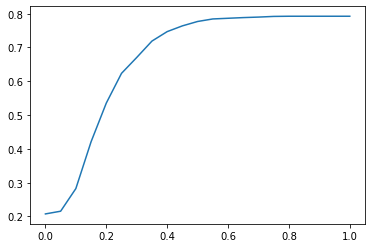

In [331]:
plt.plot(thresholds, scores)

We creat a confusion matrix that will help us find precision(p) and recall(r)

In [332]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [333]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [334]:
# tp - true positive, tn - true negative, fp - false positive, fn - false negative.
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [335]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1540,   45],
       [ 401,   14]])

In [336]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.77, 0.02],
       [0.2 , 0.01]])

In [337]:
p = tp / (tp + fp)
p

0.23728813559322035

In [338]:
r = tp / (tp + fn)
r


0.033734939759036145

Now let's plot the roc curve to see the performace of this model

In [339]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

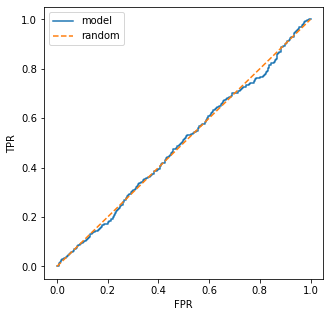

In [340]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

So far, it is shown that our model is bad. 

In [341]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.4962608794800654

In [342]:
roc_auc_score(y_val, y_pred)

0.4962608794800654

I have tried removing features from the dataset, and what I noticed is that this dataset needs more features. As I removed features, the auc reduced but with more features the model increased

Buidling a **decision tree** to see if the model can improve